In [5]:
%matplotlib inline
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
#from happyday import *
import MCEqRunF

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'],  'size': 18})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold',
        'size': 18}

SyntaxError: invalid syntax (MCEqRunF.py, line 16)

### DM Flux

In [2]:
import neutrinocommon.astro.DM as DM
import neutrinocommon.physconst.physicsconstants as PC
pc=PC.PhysicsConstants()
neutrino_t=0;antineutrino_t=1;

ModuleNotFoundError: No module named 'neutrinocommon'

### Effective Area

In [3]:
from scipy.interpolate import interp1d

class interp1d_picklable:
    """ class wrapper for piecewise linear function
    """
    def __init__(self, xi, yi, **kwargs):
        self.xi = xi
        self.yi = yi
        self.args = kwargs
        self.f = interp1d(xi, yi, **kwargs)

    def __call__(self, xnew):
        return self.f(xnew)

    def __getstate__(self):
        return self.xi, self.yi, self.args

    def __setstate__(self, state):
        self.f = interp1d(state[0], state[1], **state[2])

In [4]:
guy=open("/Users/jonesb/Documents/Work/SolarAtmosphere/EffAreasIC/EffAScripts/EffAreaFunctions.dat","r")
thatguy=pickle.load(guy)
effareaobject=thatguy

NameError: name 'pickle' is not defined

In [5]:
effareaobject.keys()

NameError: name 'effareaobject' is not defined

# Solar Atmospheric Neutrino Flux

In [49]:
def LoadTotalFlux(FileName,NuType):
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    initialmag=2
    EArray=np.loadtxt(FileName)
    EGrid=EArray[0]
    Soln=EArray[NameToID["total_"+NuType]+1]
    return (EGrid,Soln*pow(EGrid,-2.))

In [50]:
def LoadTotalAggregatedFlux(FileName,ColumnIndex):
    initialmag=0
    Array=np.loadtxt(FileName)
    EGrid=Array[0,:]
    Soln=2.*Array[ColumnIndex,:]
    return (EGrid,Soln)

In [51]:

def MakeRate(EGrid, Flux, EffAreaObject, nutype,solidangle):
    m2tocm2=1e4

    Rate=[]
    for iE in range(0,len(EGrid)):
        Rate.append(Flux[iE]*EffAreaObject(EGrid[iE])*solidangle*m2tocm2*2.)
    return Rate

In [52]:
effective_area_selection='ANTARES'
EffAreaCap=5001


In [53]:
solarsa=6.87e-5
#EGridNuMu,FluxNuMu=LoadTotalFlux("../OutputsCorrected/HybridModelShorter_SIBYLL2.3_ppMRS_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt",'numu')
EGridNu,FluxNuMu=LoadTotalAggregatedFlux("../neo_propagated/IntegratedNu.dat",2)
#EGridNuMuBar,FluxNuMuBar=LoadTotalFlux("../OutputsCorrected/HybridModelShorter_SIBYLL2.3_ppMRS_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt",'antinumu')
EGridNuBar,FluxNuMuBar=LoadTotalAggregatedFlux("../neo_propagated/IntegratedNubar.dat",2)
BGRateNuMuSun=MakeRate(EGridNu,FluxNuMu,effareaobject[effective_area_selection][0],"numu",solarsa)
BGRateNuMuBarSun=MakeRate(EGridNuBar,FluxNuMuBar,effareaobject[effective_area_selection][1],"numubar",solarsa)
BGRateTotalSun=np.array(BGRateNuMuSun)+np.array(BGRateNuMuBarSun)


In [1]:
f, axes = plt.subplots(1,3,  sharey=True,figsize=(9,3.75))
FancyNamesNu=[r"$\nu_e$",r"$\nu_\mu$",r"$\nu_\tau$"]
FancyNamesNuBar=[r"$\bar\nu_e$",r"$\bar\nu_\mu$",r"$\bar\nu_\tau$"]
Colors=['blue','green']
PreOscNuMu=np.loadtxt("../MCEq/PrePropagated1.dat")[0:44]
NuLo=interp1d(PreOscNuMu[0],PreOscNuMu[2],fill_value=0,bounds_error=False,kind='linear')
NuHi=interp1d(PreOscNuMu[0],PreOscNuMu[3],fill_value=0,bounds_error=False,kind='linear')
NubarLo=interp1d(PreOscNuMu[0],PreOscNuMu[5],fill_value=0,bounds_error=False,kind='linear')
NubarHi=interp1d(PreOscNuMu[0],PreOscNuMu[6],fill_value=0,bounds_error=False,kind='linear')


for axi in range(0,3):
    ax=axes[axi]
    PreOsc=np.loadtxt("../MCEq/PrePropagated"+str(axi)+".dat")[0:44]  
    ax.loglog(PreOsc[0],PreOsc[1]*solarsa,linewidth=2,linestyle='--',color='darkgreen')
    ax.loglog(PreOsc[0],PreOsc[4]*solarsa,linewidth=2,linestyle='--',color='darkblue')



    EGridNuMu,FluxNu=LoadTotalAggregatedFlux("../DataRelease/PostPropagation/SIBYLL2.3_ppMRS_CombinedGHAndHG_H4a_nu.txt",axi+1)
    EGridNuBar,FluxNuBar=LoadTotalAggregatedFlux("../DataRelease/PostPropagation/SIBYLL2.3_ppMRS_CombinedGHAndHG_H4a_nubar.txt",axi+1)


    ax.loglog(EGridNu,pow(EGridNu,3)*FluxNu*solarsa,label=FancyNamesNu[axi],color='green')
    ax.loglog(EGridNuBar,pow(EGridNu,3)*FluxNuBar*solarsa,label=FancyNamesNuBar[axi],color='blue')
    TopInd=335
    ax.fill_between(EGridNu[0:TopInd],abs(pow(EGridNu[0:TopInd],3)*FluxNu[0:TopInd]*NuLo(EGridNu[0:TopInd]))*solarsa,abs(pow(EGridNu[0:TopInd],3)*FluxNu[0:TopInd]*NuHi(EGridNu[0:TopInd]))*solarsa,color='darkgreen',alpha=0.2)
    ax.fill_between(EGridNu[0:TopInd],abs(pow(EGridNu[0:TopInd],3)*FluxNuBar[0:TopInd]*NubarLo(EGridNu[0:TopInd]))*solarsa,abs(pow(EGridNu[0:TopInd],3)*FluxNuBar[0:TopInd]*NubarHi(EGridNu[0:TopInd]))*solarsa,color='darkblue',alpha=0.2)
    
    neutrinos=['nue','numu','nutau']
    linestyles=['-','--',':']
    ax.set_ylim(2e-8,2e-5)
    ax.set_xlim(10,1e5)
    ax.set_xlabel(r"$E_\nu$/GeV",fontsize=14)

    if axi==0:
        ax.set_ylabel(r"$F_{\nu}$ ($E_\nu$/GeV)$^3$ (cm$^{2}$ s GeV)$^{-1}$",fontsize=14)
    ax.set_xticks([10,100,1000,10000])
    ax.set_xticks([10,100,1000,10000])
    ax.tick_params(axis='both', which='major', labelsize=16)
    if(axi==0):
        ax.text(15,1e-5,r"Dashed: at production",fontsize=16,ha='left',va='bottom')
        ax.text(15,6e-6,r"Solid: at Earth",fontsize=16,ha='left',va='bottom')


    ax.legend(loc='lower left',fontsize=16)
    ax.grid()
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
f.subplots_adjust(wspace=0.05)
plt.savefig("FluxAtEarth.png",bbox_inches=0,dpi=400)
plt.show()



NameError: name 'plt' is not defined

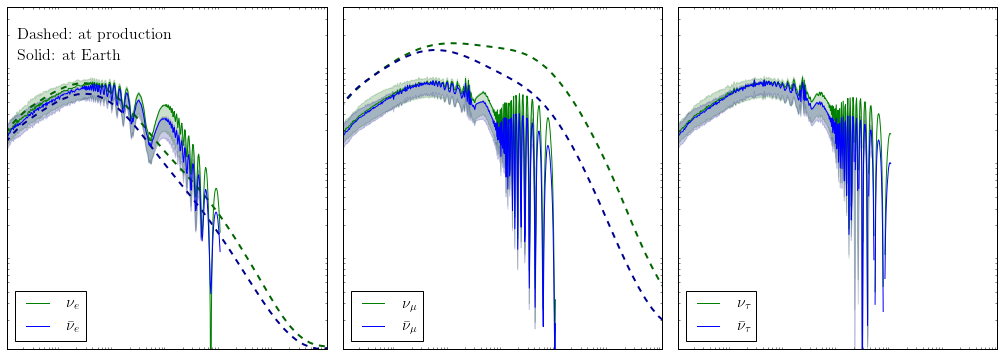

In [55]:
f, axes = plt.subplots(1,3,  sharey=True,figsize=(14,5))
FancyNamesNu=[r"$\nu_e$",r"$\nu_\mu$",r"$\nu_\tau$"]
FancyNamesNuBar=[r"$\bar\nu_e$",r"$\bar\nu_\mu$",r"$\bar\nu_\tau$"]
Colors=['blue','green']
PreOscNuMu=np.loadtxt("../MCEq/PrePropagated1.dat")[0:44]
NuLo=interp1d(PreOscNuMu[0],PreOscNuMu[2],fill_value=0,bounds_error=False,kind='linear')
NuHi=interp1d(PreOscNuMu[0],PreOscNuMu[3],fill_value=0,bounds_error=False,kind='linear')
NubarLo=interp1d(PreOscNuMu[0],PreOscNuMu[5],fill_value=0,bounds_error=False,kind='linear')
NubarHi=interp1d(PreOscNuMu[0],PreOscNuMu[6],fill_value=0,bounds_error=False,kind='linear')


for axi in range(0,3):
    ax=axes[axi]
    PreOsc=np.loadtxt("../MCEq/PrePropagated"+str(axi)+".dat")[0:44]  
    ax.loglog(PreOsc[0],PreOsc[1],linewidth=2,linestyle='--',color='darkgreen')
    ax.loglog(PreOsc[0],PreOsc[4],linewidth=2,linestyle='--',color='darkblue')



    EGridNuMu,FluxNu=LoadTotalAggregatedFlux("../neo_propagated/IntegratedNu.dat",axi+1)
    EGridNuBar,FluxNuBar=LoadTotalAggregatedFlux("../neo_propagated/IntegratedNubar.dat",axi+1)  
    
    ax.loglog(EGridNu,pow(EGridNu,3)*FluxNu,label=FancyNamesNu[axi],color='green')
    ax.loglog(EGridNuBar,pow(EGridNu,3)*FluxNuBar,label=FancyNamesNuBar[axi],color='blue')
    TopInd=335
    ax.fill_between(EGridNu[0:TopInd],abs(pow(EGridNu[0:TopInd],3)*FluxNu[0:TopInd]*NuLo(EGridNu[0:TopInd])),abs(pow(EGridNu[0:TopInd],3)*FluxNu[0:TopInd]*NuHi(EGridNu[0:TopInd])),color='darkgreen',alpha=0.2)
    ax.fill_between(EGridNu[0:TopInd],abs(pow(EGridNu[0:TopInd],3)*FluxNuBar[0:TopInd]*NubarLo(EGridNu[0:TopInd])),abs(pow(EGridNu[0:TopInd],3)*FluxNuBar[0:TopInd]*NubarHi(EGridNu[0:TopInd])),color='darkblue',alpha=0.2)
    
    neutrinos=['nue','numu','nutau']
    linestyles=['-','--',':']
    ax.set_ylim(1e-4,4e-1)
    ax.set_xlim(10,1e7)
  #  ax.set_xlabel(r"$E_\nu$/GeV",fontsize=14)

    #if axi==0:
    #    ax.set_ylabel(r"$\Phi_{\nu}$ ($E_\nu$/GeV)$^3$ (cm$^{2}$ s sr GeV)$^{-1}$",fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    if(axi==0):
        ax.text(15,2e-1,r"Dashed: at production",fontsize=16,ha='left',va='center')
        ax.text(15,1.2e-1,r"Solid: at Earth",fontsize=16,ha='left',va='center')


    ax.legend(loc='lower left',fontsize=16)
    ax.grid()
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
f.subplots_adjust(wspace=0.05)
#plt.savefig("FluxAtEarth.png",bbox_inches=0,dpi=400)
plt.show()



In [56]:
FluxNu

array([  1.82667732e-05,   1.70817075e-05,   1.63712722e-05,
         1.56530821e-05,   1.45095802e-05,   1.36688012e-05,
         1.31715149e-05,   1.22743693e-05,   1.16858927e-05,
         1.08577977e-05,   9.97816682e-06,   9.64881518e-06,
         9.04781413e-06,   8.39967223e-06,   7.97074146e-06,
         7.71797370e-06,   6.99523813e-06,   6.61447815e-06,
         6.47799367e-06,   5.86322580e-06,   5.65369383e-06,
         5.16463109e-06,   4.80259415e-06,   4.56853687e-06,
         4.33305851e-06,   4.08442111e-06,   3.77496050e-06,
         3.64165354e-06,   3.44606398e-06,   3.24354018e-06,
         2.99736174e-06,   2.81937954e-06,   2.58829485e-06,
         2.48602868e-06,   2.32145164e-06,   2.16311274e-06,
         1.97479769e-06,   1.84935547e-06,   1.77473519e-06,
         1.69836147e-06,   1.56218057e-06,   1.43188511e-06,
         1.36708748e-06,   1.28315790e-06,   1.18222965e-06,
         1.10491088e-06,   1.05285034e-06,   9.78029828e-07,
         8.97015641e-07,

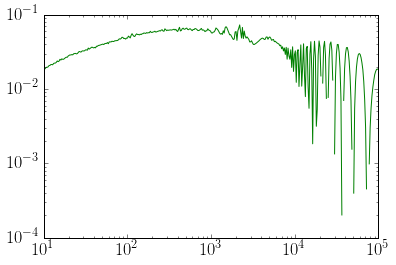

In [57]:
plt.loglog(EGridNu,pow(EGridNu,3)*FluxNu,label=FancyNamesNu[axi],color='green')



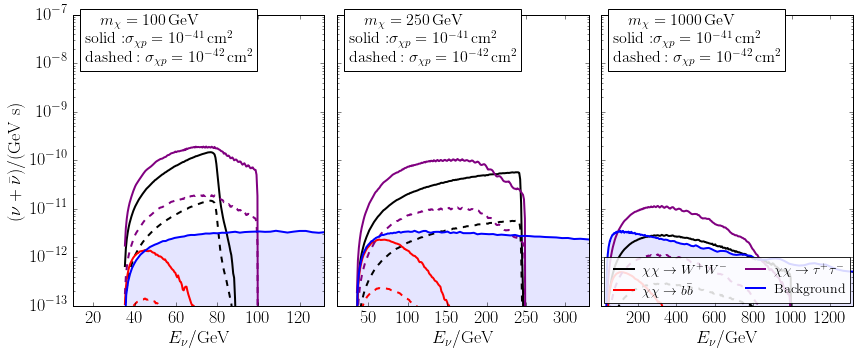

In [58]:
m2tocm2=1
Epsilon=1e-18

f, axes = plt.subplots(1,3,  sharey=True,figsize=(12,5))

Masses=[100,250,1000]
for i in range(0,len(Masses)):
    Mass=Masses[i]
    ax=axes[i]

    dm=Mass*pc.GeV

    E_range=np.linspace(10.,dm/pc.GeV,200)
    
    ax.fill_between(EGridNuMu,np.ones_like(BGRateTotalSun)*1e-18,BGRateTotalSun+1e-18,color='blue',alpha=0.1)


    sig=1.0e-41*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('WW',dm,sig,pc)

    ax.plot(E_range,
         np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)*m2tocm2*thatguy[effective_area_selection][neutrino_t](EE)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)*m2tocm2*thatguy[effective_area_selection][antineutrino_t](EE)
          for EE in E_range])+Epsilon, lw=2, color="k",ls="solid",label=r"$\chi\chi\rightarrow W^+W^-$")

    sig=1.0e-42*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('WW',dm,sig,pc)

    ax.plot(E_range,
         np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)*m2tocm2*thatguy[effective_area_selection][neutrino_t](EE)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)*m2tocm2*thatguy[effective_area_selection][antineutrino_t](EE)
          for EE in E_range])+Epsilon, lw=2, color="k",ls="dashed")

   
    sig=1.0e-41*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('bb',dm,sig,pc)

    ax.plot(E_range,
         np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)*m2tocm2*thatguy[effective_area_selection][neutrino_t](EE)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)*m2tocm2*thatguy[effective_area_selection][antineutrino_t](EE)
          for EE in E_range])+Epsilon, lw=2, color="red",ls="solid",label=r"$\chi\chi\rightarrow b\bar{b}$")

    sig=1.0e-42*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('bb',dm,sig,pc)

    ax.plot(E_range,
         np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)*m2tocm2*thatguy[effective_area_selection][neutrino_t](EE)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)*m2tocm2*thatguy[effective_area_selection][antineutrino_t](EE)
          for EE in E_range])+Epsilon, lw=2, color="red",ls="dashed")

   
    sig=1.0e-41*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('tautau',dm,sig,pc)

    ax.plot(E_range,
         np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)*m2tocm2*thatguy[effective_area_selection][neutrino_t](EE)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)*m2tocm2*thatguy[effective_area_selection][antineutrino_t](EE)
          for EE in E_range])+Epsilon, lw=2, color="purple",ls="solid",label=r"$\chi\chi\rightarrow \tau^+\tau^-$")

    sig=1.0e-42*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('tautau',dm,sig,pc)

    ax.plot(E_range,
         np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)*m2tocm2*thatguy[effective_area_selection][neutrino_t](EE)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)*m2tocm2*thatguy[effective_area_selection][antineutrino_t](EE)
          for EE in E_range])+Epsilon, lw=2, color="purple",ls="dashed")
    
    ax.plot(EGridNuMu,BGRateTotalSun,'-',linewidth=2,label=r"Background")


    ax.set_xlim(1e1,Mass*330./250.)
    ax.set_ylim(1e-13,1e-7)
    if(i==2):
        leg=ax.legend( ncol=2, mode='expand', loc="lower left", fontsize=14,handletextpad=0.3,borderaxespad=0.2)
        leg.get_frame().set_alpha(0.85)

    ax.text(10+Mass*15./250., 1e-8,r"$m_\chi = "+str(Mass)+r"\,{\rm GeV} \\ \mathrm{solid:} \sigma_{\chi p}=10^{-41} \,{\rm cm^2} \\ \mathrm{dashed}: \sigma_{\chi p}=10^{-42} \,{\rm cm^2}$",fontsize=16,bbox={'facecolor':'white', 'alpha':1, 'pad':5})

    ax.semilogy()
    if(i==0):
        ax.set_ylabel(r"$(\nu+\bar\nu)/{\rm (GeV~s)}$")
    ax.set_xlabel(r"$E_\nu/{\rm GeV}$")
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
f.subplots_adjust(wspace=0.05)

plt.savefig(effective_area_selection+"Signals.png",dpi=600,bbox_inches='tight')

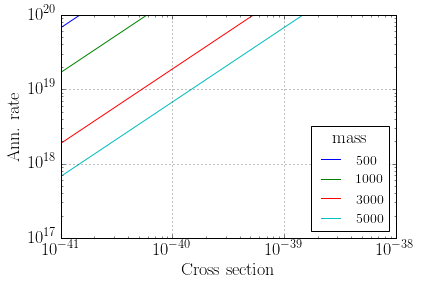

In [59]:
cs=np.logspace(-41,-38,30)
Masses=[500,1000,3000,5000]
for m in Masses:
    annrate=[]
    for c in cs:
        annrate.append(DM.DMSunAnnihilationJungmanSD(m*pc.GeV,c*(pc.cm)**2,pc)*pc.sec)
    plt.loglog(cs, annrate,label=str(m))
plt.semilogy()
plt.ylim(1e17,1e20)
plt.legend(loc='lower right',fontsize=14,title="mass")
plt.xlabel("Cross section")
plt.ylabel("Ann. rate")
plt.grid()
plt.show()


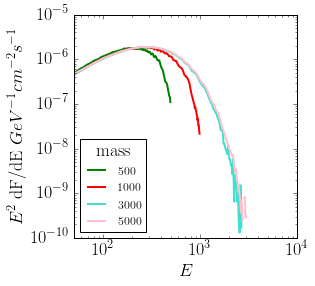

In [60]:
CS=[ 1.83909259911e-41, 7.27896867931e-41, 6.50607219888e-40,1.80478162132e-39]
m2tocm2=1.0e-4
oneyear=365*24*60*60
Epsilon=1e-18

plt.figure(figsize=(4,4))
Masses=[500,1000,3000,5000]
Colors=['green','red','turquoise','pink']
for i in range(0,len(Masses)):
    Mass=Masses[i]

    dm=Mass*pc.GeV

    E_range=np.linspace(50.,dm/pc.GeV,1e2)

    sig=CS[i]*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('tautau',dm,sig,pc)
    TheFlux=m2tocm2*np.array([(FluxObject.numu_flux(EE*pc.GeV,neutrino_t)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t))
          for EE in E_range])
    plt.loglog(E_range,
          E_range*E_range*TheFlux, lw=2, color=Colors[i],ls="solid",label=Mass)
    beacomfloor=np.loadtxt("BeacomFloor.csv",delimiter=',')
    
#    plt.loglog(EGridNuMu,EGridNuMu*BGRateTotalSun*oneyear,'-',linewidth=2,label=r"Us",color='blue')
#    plt.loglog(beacomfloor[:,0],beacomfloor[:,1],'--',linewidth=2,label=r"Beacom",color='dimgrey')
    
 #   plt.ylim(1e-8,1e-5)
    plt.xlim(50,1e4)
    plt.legend(loc='lower left',fontsize=12,title='mass')
    plt.ylabel(r"$E^2$ dF/dE $GeV^{-1} cm^{-2} s^{-1}$")
    plt.xlabel(r"$E$")


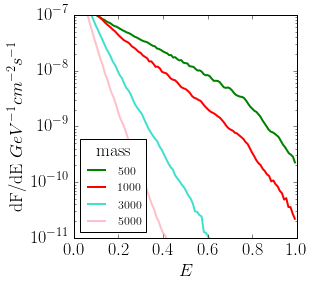

In [61]:
CS=[ 1.83909259911e-41, 7.27896867931e-41, 6.50607219888e-40,1.80478162132e-39]
m2tocm2=1.0e-4
oneyear=365*24*60*60
Epsilon=1e-18

plt.figure(figsize=(4,4))
Masses=[500,1000,3000,5000]
Colors=['green','red','turquoise','pink']
for i in range(0,len(Masses)):
    Mass=Masses[i]

    dm=Mass*pc.GeV

    E_range=np.linspace(50.,dm/pc.GeV,1e2)

    sig=CS[i]*(pc.cm)**2
    FluxObject=DM.DMFluxAtDetector('tautau',dm,sig,pc)
    TheFlux=m2tocm2*np.array([(FluxObject.numu_flux(EE*pc.GeV,neutrino_t)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t))
          for EE in E_range])
    plt.semilogy(E_range/Mass,
          Mass*TheFlux, lw=2, color=Colors[i],ls="solid",label=Mass)
    beacomfloor=np.loadtxt("BeacomFloor.csv",delimiter=',')
    
#    plt.loglog(EGridNuMu,EGridNuMu*BGRateTotalSun*oneyear,'-',linewidth=2,label=r"Us",color='blue')
#    plt.loglog(beacomfloor[:,0],beacomfloor[:,1],'--',linewidth=2,label=r"Beacom",color='dimgrey')
    
    plt.ylim(1e-11,1e-7)
 #   plt.xlim(50,1e4)
    plt.legend(loc='lower left',fontsize=12,title='mass')
    plt.ylabel(r"dF/dE $GeV^{-1} cm^{-2} s^{-1}$")
    plt.xlabel(r"$E$")



In [62]:
TheFlux

array([  1.88043385e-10,   1.05502849e-10,   6.64678226e-11,
         4.38244176e-11,   3.03778195e-11,   2.11001424e-11,
         1.48699329e-11,   1.08732762e-11,   7.87451082e-12,
         5.85291767e-12,   4.29949601e-12,   3.17335358e-12,
         2.46579695e-12,   1.74158984e-12,   1.41672630e-12,
         1.02575422e-12,   7.80562669e-13,   6.40093539e-13,
         4.76768740e-13,   3.47221430e-13,   2.67100590e-13,
         2.22778046e-13,   1.74534231e-13,   1.31977524e-13,
         9.66151044e-14,   7.16864481e-14,   5.76022051e-14,
         4.82099003e-14,   3.64425622e-14,   3.07568809e-14,
         2.47511285e-14,   1.83585589e-14,   1.35128303e-14,
         1.02380914e-14,   8.01635230e-15,   6.53783221e-15,
         4.78925383e-15,   3.98573901e-15,   3.04081269e-15,
         2.44432147e-15,   2.19944103e-15,   1.76752360e-15,
         1.47117888e-15,   1.50382303e-15,   8.00265557e-16,
         5.69071900e-16,   6.33517504e-16,   3.62338483e-16,
         2.82657936e-16,

In [63]:
print(FluxObject.numu_flux(100*pc.GeV,neutrino_t))
print(FluxObject.numu_flux(100*pc.GeV,antineutrino_t))

4.98566667127e-07
5.56461820436e-07


In [64]:
 np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)
          for EE in E_range])

array([  1.88043385e-06,   1.05502849e-06,   6.64678226e-07,
         4.38244176e-07,   3.03778195e-07,   2.11001424e-07,
         1.48699329e-07,   1.08732762e-07,   7.87451082e-08,
         5.85291767e-08,   4.29949601e-08,   3.17335358e-08,
         2.46579695e-08,   1.74158984e-08,   1.41672630e-08,
         1.02575422e-08,   7.80562669e-09,   6.40093539e-09,
         4.76768740e-09,   3.47221430e-09,   2.67100590e-09,
         2.22778046e-09,   1.74534231e-09,   1.31977524e-09,
         9.66151044e-10,   7.16864481e-10,   5.76022051e-10,
         4.82099003e-10,   3.64425622e-10,   3.07568809e-10,
         2.47511285e-10,   1.83585589e-10,   1.35128303e-10,
         1.02380914e-10,   8.01635230e-11,   6.53783221e-11,
         4.78925383e-11,   3.98573901e-11,   3.04081269e-11,
         2.44432147e-11,   2.19944103e-11,   1.76752360e-11,
         1.47117888e-11,   1.50382303e-11,   8.00265557e-12,
         5.69071900e-12,   6.33517504e-12,   3.62338483e-12,
         2.82657936e-12,

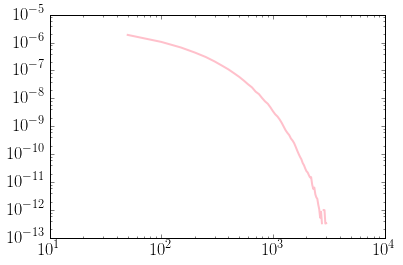

In [65]:
   plt.loglog(E_range,
         np.array([FluxObject.numu_flux(EE*pc.GeV,neutrino_t)+
          FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)
          for EE in E_range]), lw=2, color=Colors[i],ls="solid",label=Mass)

In [66]:
def GetSBRatio(mchi, xs,mode='bb',EPrecision=100,Plots=False):

    Evals=np.linspace(10,mchi,EPrecision)
    FluxObject=DM.DMFluxAtDetector(mode,mchi*pc.GeV,xs*pc.cm**2,pc)

    Sigs=[]
    for EE in Evals:
        Sigs.append(FluxObject.numu_flux(EE*pc.GeV,neutrino_t)*thatguy[effective_area_selection][neutrino_t](EE)+
            FluxObject.numu_flux(EE*pc.GeV,antineutrino_t)*thatguy[effective_area_selection][antineutrino_t](EE))
      
    BGRateNuMu=BGRateTotalSun   
    
    #Find where 90% of the signal is    
    Threshold=0.05
    SigsCum=np.cumsum(Sigs)
    fCumulant=interp1d_picklable(SigsCum/sum(Sigs),Evals,fill_value=0,bounds_error=False,kind='linear')
    EHighThresh=fCumulant(1.-Threshold)
    ELowThresh=fCumulant(Threshold)

    fSignal=interp1d_picklable(Evals,Sigs,fill_value=0,bounds_error=False,kind='linear')
    fBackground=interp1d_picklable(EGridNuMu, BGRateTotalSun, fill_value=0, bounds_error=False, kind='linear')    
    if(Plots):
        EGrid=np.arange(0,1000,0.1)
        plt.plot(EGrid,fSignal(EGrid))
        plt.plot(EGrid,fBackground(EGrid))
        plt.plot([ELowThresh,EHighThresh],[max(fSignal(EGrid)),max(fSignal(EGrid))],'o',color='red')
        plt.loglog()
        plt.show()
    SigIntegral=quad(fSignal, ELowThresh, EHighThresh)[0]
    BGIntegral=quad(fBackground, ELowThresh, EHighThresh)[0]

    return SigIntegral, BGIntegral,ELowThresh,EHighThresh


In [67]:
from scipy.integrate import quad

In [72]:
massesbb=[25,50,100,176,200,250,350, 500,750,1000,2000,3000,5000]
massesbb=[200,250,350, 500,750,1000,2000,3000,5000]
chis=np.logspace(-43,-38,15)*5
bbSigBack2D=[]
bbSigBackRatio2D=[]
massesBelowEffAreaCapbb=[]
LowThreshsbb=[]
HighThreshsbb=[]
for m in massesbb:
    if(m<EffAreaCap):
        bbSigBack=[]
        bbSigBackRatio=[]
        for chi in chis:
            ReturnVals=GetSBRatio(m, chi, mode='bb',EPrecision=100)
            bbSigBack.append(ReturnVals)
            bbSigBackRatio.append(ReturnVals[0]/ReturnVals[1])
        LowThreshsbb.append(ReturnVals[1])
        HighThreshsbb.append(ReturnVals[2])
        massesBelowEffAreaCapbb.append(m)
        bbSigBack2D.append(np.array(bbSigBack))
        bbSigBackRatio2D.append(np.array(bbSigBackRatio))
    print m
bbSigBack2D=np.array(bbSigBack)

200
250
350
500
750
1000
2000
3000
5000


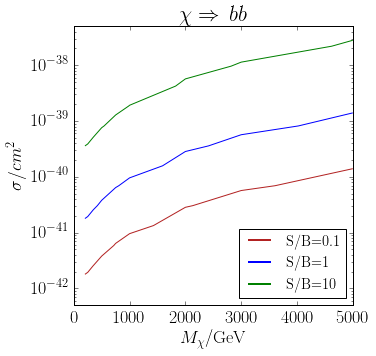

In [73]:
plt.figure(figsize=(5,5))
plt.semilogy()
Ms, Chis = np.meshgrid(massesBelowEffAreaCapbb, chis)
CS = plt.contour(Ms, Chis, np.array(bbSigBackRatio2D).transpose(),levels=[0.1,1,20],colors=['firebrick','blue','green'])
plt.ylabel(r"$\sigma / cm^2$")
plt.xlabel(r"$M_\chi$/GeV")
plt.plot([0],[0],linestyle='-',linewidth=2,color='firebrick',label='S/B=0.1')
plt.plot([0],[0],linestyle='-',linewidth=2,color='blue',label='S/B=1')
plt.plot([0],[0],linestyle='-',linewidth=2,color='green',label='S/B=10')
plt.title("$\chi \Rightarrow \,bb$")
plt.legend(loc='lower right',fontsize=14.5)



In [74]:

Contour0p1=CS.allsegs[0][0]
Contour1=CS.allsegs[1][0]
Contour10=CS.allsegs[2][0]

np.savetxt(effective_area_selection+"_Contour_0p1_bb.txt",Contour0p1)
np.savetxt(effective_area_selection+"_Contour_1_bb.txt",Contour1)
np.savetxt(effective_area_selection+"_Contour_10_bb.txt",Contour10)




In [71]:

massesWW=[80.3,100,150,176, 200,350,500,750,1000,2000,3000,5000]
chis=np.logspace(-43,-38,20)
WWSigBack2D=[]
WWSigBackRatio2D=[]
LowThreshsWW=[]
HighThreshsWW=[]
massesBelowEffAreaCapWW=[]

for m in massesWW:
    if(m<EffAreaCap):
        WWSigBack=[]
        WWSigBackRatio=[]
        for chi in chis:
            ReturnVals=GetSBRatio(m, chi, mode='WW',EPrecision=100)
            WWSigBack.append(ReturnVals)
            WWSigBackRatio.append(ReturnVals[0]/ReturnVals[1])
        LowThreshsWW.append(ReturnVals[2])
        HighThreshsWW.append(ReturnVals[3])
        massesBelowEffAreaCapWW.append(m)
        WWSigBack2D.append(np.array(WWSigBack))
        WWSigBackRatio2D.append(np.array(WWSigBackRatio))
        print m
WWSigBack2D=np.array(WWSigBack)

80.3
100
150
176
200
350
500
750


KeyboardInterrupt: 

In [ ]:
WWSigBack2D

In [ ]:
plt.figure(figsize=(5,5))
plt.semilogy()
Ms, Chis = np.meshgrid(massesBelowEffAreaCapWW, chis)
CS = plt.contour(Ms, Chis, np.array(WWSigBackRatio2D).transpose(),levels=[0.1,1,10],colors=['firebrick','blue','green'])
plt.ylabel(r"$\sigma / cm^2$")
plt.xlabel(r"$M_\chi$/GeV")
plt.plot([0],[0],linestyle='-',linewidth=2,color='firebrick',label='S/B=0.1')
plt.plot([0],[0],linestyle='-',linewidth=2,color='blue',label='S/B=1')
plt.plot([0],[0],linestyle='-',linewidth=2,color='green',label='S/B=10')
plt.title("$\chi \Rightarrow \,WW$")
plt.legend(loc='lower right',fontsize=14.5)



In [ ]:
Contour0p1=CS.allsegs[0][0]
Contour1=CS.allsegs[1][0]
Contour10=CS.allsegs[2][0]

np.savetxt(effective_area_selection+"_Contour_0p1_WW.txt",Contour0p1)
np.savetxt(effective_area_selection+"_Contour_1_WW.txt",Contour1)
np.savetxt(effective_area_selection+"_Contour_10_WW.txt",Contour10)



In [ ]:
massestt=[25,50,100,176,200,250,350, 500,750,1000,2000,3000,5000]
chis=np.logspace(-43,-38,10)
ttSigBack2D=[]
ttSigBackRatio2D=[]
massesBelowEffAreaCaptt=[]
LowThreshstt=[]
HighThreshstt=[]
for m in massestt:
    if(m<EffAreaCap):
        ttSigBack=[]
        ttSigBackRatio=[]
        for chi in chis:
            ReturnVals=GetSBRatio(m, chi, mode='tautau',EPrecision=100)
            ttSigBack.append(ReturnVals)
            ttSigBackRatio.append(ReturnVals[0]/ReturnVals[1])
        LowThreshstt.append(ReturnVals[1])
        HighThreshstt.append(ReturnVals[2])
        massesBelowEffAreaCaptt.append(m)
        ttSigBack2D.append(np.array(ttSigBack))
        ttSigBackRatio2D.append(np.array(ttSigBackRatio))
    print m
ttSigBack2D=np.array(ttSigBack)

In [ ]:
plt.figure(figsize=(5,5))
plt.semilogy()
Ms, Chis = np.meshgrid(massesBelowEffAreaCaptt, chis)
CS = plt.contour(Ms, Chis, np.array(ttSigBackRatio2D).transpose(),levels=[0.1,1,10],colors=['firebrick','blue','green'])
plt.ylabel(r"$\sigma / cm^2$")
plt.xlabel(r"$M_\chi$/GeV")
plt.plot([0],[0],linestyle='-',linewidth=2,color='firebrick',label='S/B=0.1')
plt.plot([0],[0],linestyle='-',linewidth=2,color='blue',label='S/B=1')
plt.plot([0],[0],linestyle='-',linewidth=2,color='green',label='S/B=10')
plt.title("$\chi \Rightarrow \,\tau\tau$")
plt.legend(loc='lower right',fontsize=14.5)




In [ ]:
Contour0p1=CS.allsegs[0][0]
Contour1=CS.allsegs[1][0]
Contour10=CS.allsegs[2][0]

np.savetxt(effective_area_selection+"_Contour_0p1_tt.txt",Contour0p1)
np.savetxt(effective_area_selection+"_Contour_1_tt.txt",Contour1)
np.savetxt(effective_area_selection+"_Contour_10_tt.txt",Contour10)




In [ ]:
plt.loglog(massesBelowEffAreaCapbb,HighThreshsbb,label='High bb')
plt.loglog(massesBelowEffAreaCapbb,LowThreshsbb,label='Low bb')
plt.loglog(massesBelowEffAreaCapWW,HighThreshsWW,label='High WW')
plt.loglog(massesBelowEffAreaCapWW,LowThreshsWW,label='Low WW')
plt.legend()

In [ ]:
YearInSeconds=3600*24*365
plt.figure(figsize=(5,5))
for a in ['IceCube','ANTARES','KM3NeT']:
    BGRateNuMuSun=MakeRate(EGridNuMu,FluxNuMu,effareaobject[a][0],"numu",solarsa)
    plt.loglog(EGridNuMu, np.array(BGRateNuMuSun),label=a)
plt.xlim(10,1e5)
#plt.ylim(1e-15,1e-7)
plt.legend(loc='lower left')
plt.xlabel("Energy / GeV")
plt.ylabel("Events / GeV yr")


In [ ]:
def MakeIntegral(EGrid, Flux, EffAreaObject,solidangle):
    m2tocm2=1e4
    Rate=[]
    Integrand=interp1d(EGrid,Flux*EffAreaObject(EGrid)*m2tocm2*2.*solidangle,bounds_error=False,fill_value=0)
    plt.semilogx(EGrid,Integrand(EGrid))
    return sum(Integrand(EGrid[:-1])*(EGrid[1:]-EGrid[:-1]))

In [ ]:
def MakePartIntegral(EGrid, Flux, EffAreaObject,solidangle):
    m2tocm2=1e4
    Rate=[]
    Integrand=interp1d(EGrid,Flux*EffAreaObject(EGrid)*m2tocm2*2.*solidangle,bounds_error=False,fill_value=0)
    plt.semilogx(EGrid,Integrand(EGrid))
    return sum(Integrand(EGrid[:-1])*(EGrid[1:]-EGrid[:-1])*(np.array(EGrid[:-1])>1e3)*(np.array(EGrid[:-1])<10000))

In [ ]:
for a in ['IceCube','PINGU+IceCube','ANTARES','KM3NeT','IC86']:
    print(a)
    print("numuUp:", MakeIntegral(EGridNu,FluxNuMu*NuHi(EGridNuMu),effareaobject[a][0],solarsa)*3600*24*365)
    print("numuDown:", MakeIntegral(EGridNu,FluxNuMu*NuLo(EGridNuMu),effareaobject[a][0],solarsa)*3600*24*365)
    print("numubarUp:", MakeIntegral(EGridNuBar,FluxNuMuBar*NuHi(EGridNuMu),effareaobject[a][1],solarsa)*3600*24*365)
    print("numubarDown:", MakeIntegral(EGridNuBar,FluxNuMuBar*NuLo(EGridNuMu),effareaobject[a][1],solarsa)*3600*24*365)

In [ ]:
for a in ['IceCube','PINGU+IceCube','ANTARES','KM3NeT','IC86']:
    print(a, "1TeV<E<10TeV")
    print("numuUp:", MakePartIntegral(EGridNuMu,FluxNuMu*NuHi(EGridNuMu),effareaobject[a][0],solarsa)*3600*24*365)
    print("numuDown:", MakePartIntegral(EGridNuMu,FluxNuMu*NuLo(EGridNuMu),effareaobject[a][0],solarsa)*3600*24*365)
    print("numubarUp:", MakePartIntegral(EGridNuMuBar,FluxNuMuBar*NuHi(EGridNuMu),effareaobject[a][1],solarsa)*3600*24*365)
    print("numubarDown:", MakePartIntegral(EGridNuMuBar,FluxNuMuBar*NuLo(EGridNuMu),effareaobject[a][1],solarsa)*3600*24*365)

In [ ]:
36./770.*2.35

In [ ]:
Gamma=1e20 # in s^-1
AU=pc.AU/pc.meter # in m
pi=3.14 
m=500   # in GeV
print (Gamma/(4*pi*AU*AU*m)) # in s^-1 m^-2 GeV^-1

In [ ]:
pc.AU/pc.meter

In [ ]:
dm=500.0*pc.GeV
sig=1.0e-40*(pc.cm)**2
unit=pc.GeV*pc.cm**2*pc.sec
unit*DM.DMSunAnnihilationRate(dm,sig,pc)/(4.*np.pi*pc.AU**2)/dm

In [ ]:
FuncNuMu=[]
FuncNuMuBar=[]
E_range=np.logspace(1,4,100)
for E in E_range:
    FuncNuMu.append(DM.DMSweFlux(E,2,'tautau',500,AtEarth=True))
    FuncNuMuBar.append(DM.DMSweFlux(E,3,'tautau',500,AtEarth=True))
plt.xlabel("E/GeV")
plt.ylabel("SweFluxOutput")

plt.loglog(E_range,FuncNuMu)
plt.loglog(E_range,FuncNuMuBar,'--')

In [ ]:
pc.meter**2*pc.sec

In [ ]:
dm=500.0*pc.GeV
sig=1.0e-43*(pc.cm)**2
unit=pc.meter**2*pc.sec*pc.GeV
unit*DM.DMSunAnnihilationRate(dm,sig,pc)/(4.*np.pi*pc.AU**2*dm)

In [ ]:
DM.DMSunAnnihilationRate(dm,sig,pc)*pc.sec

In [ ]:
pc.sec/pc.meter

In [ ]:
dm=500.0*pc.GeV
sig=1.83909259911e-41*(pc.cm)**2

unit=pc.GeV*pc.cm**2*pc.sec

guy=DM.DMSunAnnihilationRate(dm,sig,pc)/(4.*np.pi*pc.AU**2)/dm

e_range=np.logspace(0,np.log10(dm/pc.GeV),100)
coso=[unit*guy*DM.DMSweFlux(EE,2,"tautau",dm/pc.GeV) for EE in e_range]

plt.ylabel(r"$E^2 d\phi/dE\, [{\rm GeV cm^{-2} s^{-1}}]$")
plt.xlabel(r"$E_\nu/{\rm GeV}$")

plt.plot(e_range,coso*e_range**2)
plt.loglog()
plt.xlim(50.,1.0e4)

In [ ]:
dms=np.arange(0,1000,10)
plt.loglog(dms,DM.DMSunAnnihilationJungmanSD(dms*pc.GeV,sig,pc)*pc.sec,label="DMSunAnnihilationJungmanSD")
plt.loglog(dms,DM.DMSunAnnihilationRate(dms*pc.GeV,sig,pc)*pc.sec,label="DMSunAnnihilationRate")
plt.loglog(dms,DM.DMSunAnnihilationRateHooper(dms*pc.GeV,sig,pc)*pc.sec,label="DMSunAnnihilationRateHooper")


plt.legend(loc='lower left',fontsize=12)
plt.show()

In [ ]:
    pylab.loglog(EGridNu,pow(EGridNu,3)*FluxNu*solarsa,label=FancyNamesNu[axi],color='green')

